In [2]:
import utilities
import os
import csv
import pandas as pd

In [3]:
df = pd.read_csv("/home/c2/alexa/source/voice-assistant-central/NetworkAnalysis/data/report.csv")
del df['Unnamed: 0']
df

,cat,skill_name,fqdn,domain_name,SLD,subdomain,organization,ATSes,Party
0,Fashion-Style,B083PY1PGZ,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
1,Fashion-Style,B083PY1PGZ,ec2-54-166-14-123.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-54-166-14-123.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2,Fashion-Style,B087YM4KJK,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based
3,Fashion-Style,B087YM4KJK,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
4,Fashion-Style,B087YM4KJK,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
...,...,...,...,...,...,...,...,...,...
2600,Health-Fitness,B07PJWHYXM,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",others,Platform-based
2601,Health-Fitness,B07PJWHYXM,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
2602,Health-Fitness,B07PJWHYXM,ec2-34-198-99-173.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-34-198-99-173.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2603,Health-Fitness,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based


### Plot Taxonomy

In [4]:
df_party = df[['Party', 'ATSes']]
outer = df_party.groupby(['Party']).count()
outer

,ATSes
Party,
Platform-based,2483
non_Platform-based,122


In [5]:
inner = df_party.groupby(['Party', 'ATSes']).size()
inner

Party               ATSes             
Platform-based      Ad                     338
                    others                2145
non_Platform-based  Tracking/Analytics      38
                    others                  84
dtype: int64

In [6]:
inner_labels = inner.index.get_level_values(1)
inner_labels

Index(['Ad', 'others', 'Tracking/Analytics', 'others'], dtype='object', name='ATSes')

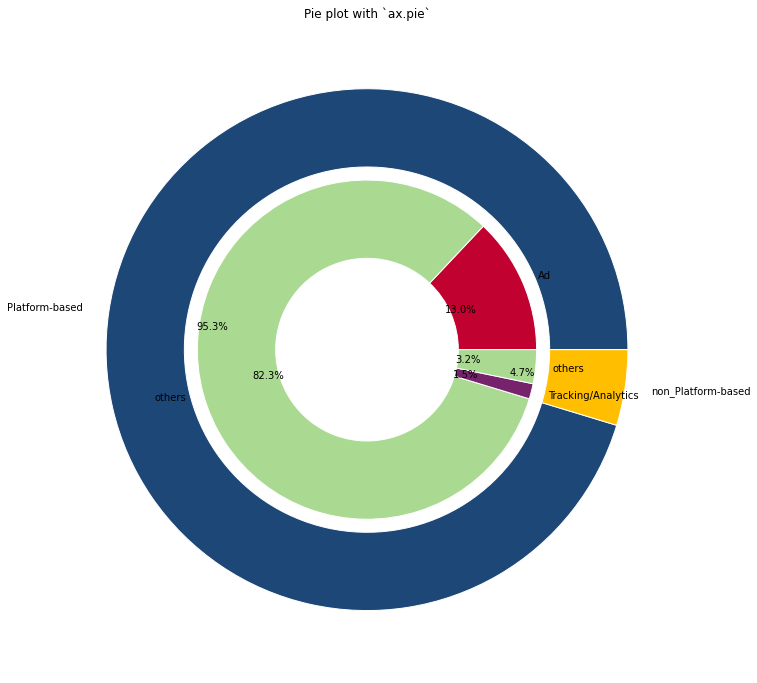

In [7]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(24,12))
size = 0.3



ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       colors=["#1D4776", "#FFBF00"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=0.65, 
       labels = inner_labels,
       autopct='%1.1f%%',
       colors=["#C10230", "#AADA91", "#76236C", "#AADA91"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.savefig("pie.png")
plt.show()

In [16]:
df_fqdn = df.loc[df['Party'] == 'Platform-based', 'fqdn']
platform_base = {}
for fqdn in df_fqdn:
    if fqdn not in platform_base:
        platform_base[fqdn] = 1
    else:
        platform_base[fqdn] += 1
fqdn_skill_num_sorted = dict(sorted(platform_base.items(), key=lambda kv: kv[1], reverse=True))

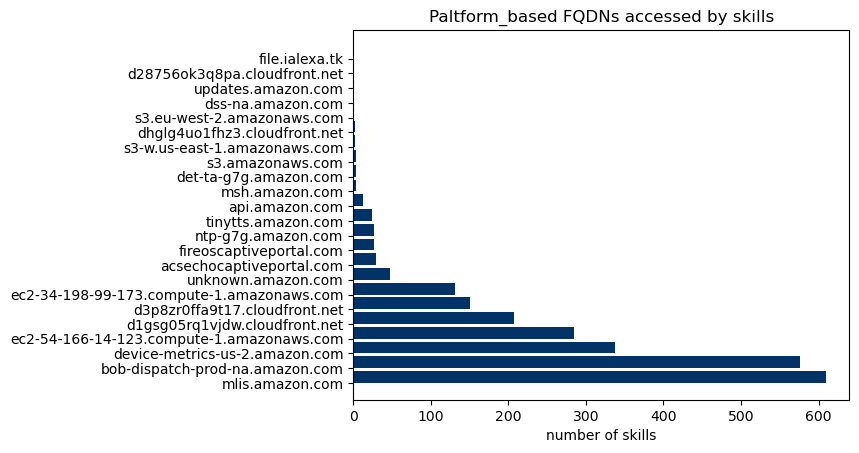

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted.items()]
y_pos = np.arange(0,len(fqdn_skill_num_sorted),1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted.items()]
#error = np.random.rand(len(fqdns))

ax.barh(y_pos, performance, align='edge', color = '#033266')
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('number of skills')
ax.set_title('Paltform_based FQDNs accessed by skills')
plt.savefig('platform_barchart.png')
plt.show()


In [18]:
df_fqdn_non = df.loc[df['Party'] == 'non_Platform-based', 'fqdn']
non_platform_base = {}
for fqdn in df_fqdn_non:
    if fqdn not in non_platform_base:
        non_platform_base[fqdn] = 1
    else:
        non_platform_base[fqdn] += 1
fqdn_skill_num_sorted_non = dict(sorted(non_platform_base.items(), key=lambda kv: kv[1], reverse=True))

In [19]:
fqdn_skill_num_sorted_non

{'play.podtrac.com': 21,
 'chtbl.com': 20,
 '1920044715.rsc.cdn77.org': 19,
 'traffic.omny.fm': 17,
 'pool-na-east-001-anycast.mc.tritondigital.com': 10,
 '24163.mc.tritondigital.com': 8,
 'edge-block-www-env.dropbox-dns.com': 8,
 'f6m8j5a8.stackpathcdn.com': 5,
 'static.garmincdn.com.cdn.cloudflare.net': 3,
 'f2.shared.global.fastly.net': 3,
 'traffic.libsyn.com': 2,
 'zs-in2-lc1-543-h2.zohopublic.in': 2,
 'cds.s7w4q6b5.hwcdn.net': 1,
 'mittendorf.net': 1,
 'files.zohopublic.in': 1,
 'o.sni.global.fastly.net': 1}

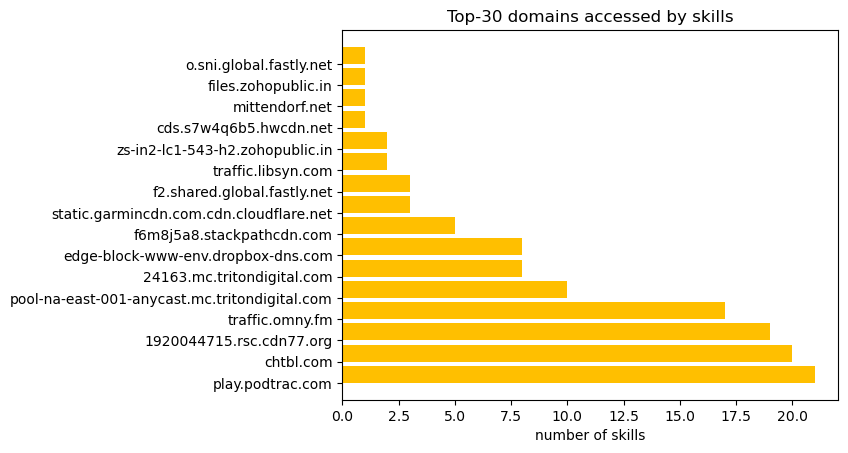

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
fqdns = [fqdn for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
y_pos = np.arange(0,len(fqdn_skill_num_sorted_non),1)
performance = [skills_nums for fqdn, skills_nums in fqdn_skill_num_sorted_non.items()]
#error = np.random.rand(len(fqdns))

ax.barh(y_pos, performance, align='edge', color='#FFBF00')
ax.set_yticks(y_pos)
ax.set_yticklabels(fqdns)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('number of skills')
ax.set_title('Top-30 domains accessed by skills')
plt.savefig('thirdparty_barchart.png')
plt.show()

In [153]:
df

,cat,skill_name,fqdn,domain_name,SLD,subdomain,organization,ATSes,Party
0,Fashion-Style,B083PY1PGZ,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
1,Fashion-Style,B083PY1PGZ,ec2-54-166-14-123.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-54-166-14-123.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2,Fashion-Style,B087YM4KJK,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based
3,Fashion-Style,B087YM4KJK,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based
4,Fashion-Style,B087YM4KJK,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
...,...,...,...,...,...,...,...,...,...
2790,Health-Fitness,B07PJWHYXM,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",others,Platform-based
2791,Health-Fitness,B07PJWHYXM,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based
2792,Health-Fitness,B07PJWHYXM,ec2-34-198-99-173.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-34-198-99-173.compute-1,"Amazon Technologies, Inc.",others,Platform-based
2793,Health-Fitness,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based


In [230]:
df['count']=1
df

,cat,skill_name,fqdn,domain_name,SLD,subdomain,organization,ATSes,Party,count
0,Fashion-Style,B083PY1PGZ,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based,1
1,Fashion-Style,B083PY1PGZ,ec2-54-166-14-123.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-54-166-14-123.compute-1,"Amazon Technologies, Inc.",others,Platform-based,1
2,Fashion-Style,B087YM4KJK,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based,1
3,Fashion-Style,B087YM4KJK,bob-dispatch-prod-na.amazon.com,amazon.com,amazon,bob-dispatch-prod-na,"Amazon Technologies, Inc.",others,Platform-based,1
4,Fashion-Style,B087YM4KJK,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based,1
...,...,...,...,...,...,...,...,...,...,...
2600,Health-Fitness,B07PJWHYXM,d3p8zr0ffa9t17.cloudfront.net,cloudfront.net,cloudfront,d3p8zr0ffa9t17,"Amazon Technologies, Inc.",others,Platform-based,1
2601,Health-Fitness,B07PJWHYXM,d1gsg05rq1vjdw.cloudfront.net,cloudfront.net,cloudfront,d1gsg05rq1vjdw,"Amazon Technologies, Inc.",others,Platform-based,1
2602,Health-Fitness,B07PJWHYXM,ec2-34-198-99-173.compute-1.amazonaws.com,amazonaws.com,amazonaws,ec2-34-198-99-173.compute-1,"Amazon Technologies, Inc.",others,Platform-based,1
2603,Health-Fitness,B07PJWHYXM,mlis.amazon.com,amazon.com,amazon,mlis,"Amazon Technologies, Inc.",others,Platform-based,1


In [231]:
categories = ['cat', 'domain_name', 'organization', 'ATSes']
df[categories].values

array([['Fashion-Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Fashion-Style', 'amazonaws.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Fashion-Style', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ...,
       ['Health-Fitness', 'amazonaws.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Health-Fitness', 'amazon.com', 'Amazon Technologies, Inc.',
        'others'],
       ['Health-Fitness', 'cloudfront.net', 'Amazon Technologies, Inc.',
        'others']], dtype=object)

In [232]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

categories = ['cat', 'domain_name', 'organization', 'ATSes']

newDf = pd.DataFrame()
for i in range(len(categories)-1):
    tempDf = df[[categories[i],categories[i+1],'count']]
    tempDf.columns = ['source','target','count']
    newDf = pd.concat([newDf,tempDf])    
newDf = newDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()


label_list = list(np.unique(df[categories].values.astype('str')))
source = newDf['source'].apply(lambda x: label_list.index(x))
target = newDf['target'].apply(lambda x: label_list.index(x))
count = newDf['count']

fig = go.Figure(data=[go.Sankey(
    node = {"label": label_list},
    link = {"source": source, "target": target, "value": count}
    )])
fig.show()

In [159]:
newDf

,source,target,count
0,"Amazon Technologies, Inc.",Ad,338
1,"Amazon Technologies, Inc.",others,2144
2,Chartable Holding Inc,others,20
3,ConnectedCar,acsechocaptiveportal.com,7
4,ConnectedCar,amazon.com,290
...,...,...,...
98,libsyn.com,Liberated Syndication,2
99,omny.fm,"Triton Digital, Inc.",17
100,podtrac.com,"Domains By Proxy, LLC",21
101,stackpathcdn.com,"StackPath, LLC",5
